 # **Ising model in 2-D lattice**

Snigdha Mohanty
Ph23c041

In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tqdm import tqdm

In [4]:
def energy(matrix,N,J):
    E=0
    for i in range(N):
        for j in range(N):
            E+= J*matrix[i,j]*(matrix[(i+1)%N,j] + matrix[(i-1)%N,j] + matrix[i,(j+1)%N] + matrix[i,(j-1)%N])
    return E/2

def energy_(matrix,N,J):
    E=0
    for i in range(N):
        for j in range(N):
            E+= J*matrix[i,j]*(matrix[(i+1)%N,j] + matrix[(i-1)%N,j] + matrix[i,(j+1)%N] + matrix[i,(j-1)%N] + matrix[(i+1)%N,(j+1)%N] + matrix[(i-1)%N,(j-1)%N])
    return E/2
    
def mean_energy(energy_array):
    return np.mean(energy_array[50000:])
    
def specific_heat(energy_list):
    sp=np.var(energy_list[50000:])/(tem*tem)
    return sp
    
def magnetisation(magnetisation_list,tem):
    M=np.abs(np.mean(magnetisation_list[50000:]))
    Ms=np.var(magnetisation_list[50000:])/tem**2
    return M,Ms
    


In [32]:
def metropolis(k,matrix,tem,N,J,flag):
    energy_func= energy if flag else energy_
    E0=energy_func(matrix,N,J)
    energy_list,magnetisation_list=[],[]
    for _ in range(k):
        i, j = np.random.randint(0, N, size=2)
        matrix[i,j]*=-1
        E=energy_func(matrix,N,J)
        delta_E = E-E0
        if delta_E <= 0 or np.random.rand() < np.exp(-delta_E/tem):
            E0+=delta_E   
        else:
            matrix[i,j]*=-1    
        energy_list.append(E0)
        magnetisation_list.append(np.abs(np.mean(matrix)))
    return energy_list, magnetisation_list
    
    

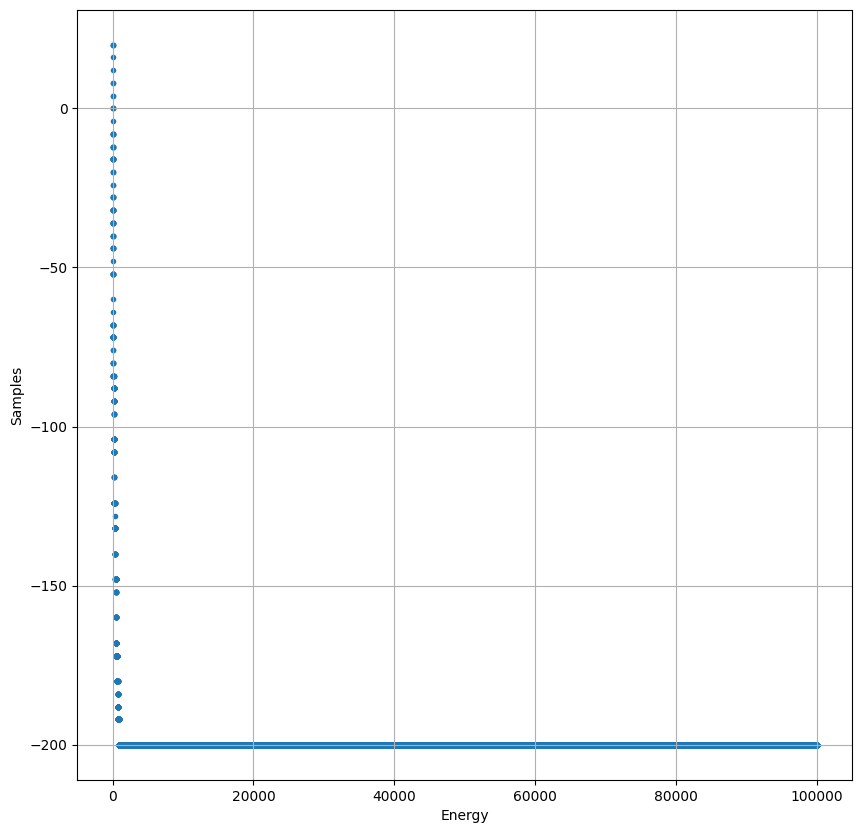

In [8]:
k = 100000
tem=0.1
N=10
matrix = np.random.choice([-1, 1], size=(N, N))

plt.figure(figsize=[10,10])
plt.scatter(range(k),metropolis(k,matrix,tem,N,-1,True)[0], marker='.')
plt.xlabel("Energy")
plt.ylabel("Samples")
plt.grid()
plt.show()

In [36]:
temp=np.linspace(1,5,25)
Eavg=[]
m=[]
ms=[]
sp=[]
for tem in tqdm(temp):
    matrix = np.random.choice([-1, 1], size=(N, N))
    energy_list,magnetisation_list = metropolis(k,matrix,tem,N,-1,True)
    m_, ms_ =magnetisation(magnetisation_list,tem)
    E=mean_energy(energy_list)
    sp_=specific_heat(energy_list)
    sp.append(sp_)
    Eavg.append(E)
    m.append(m_)
    ms.append(ms_)

100%|██████████| 25/25 [04:24<00:00, 10.58s/it]


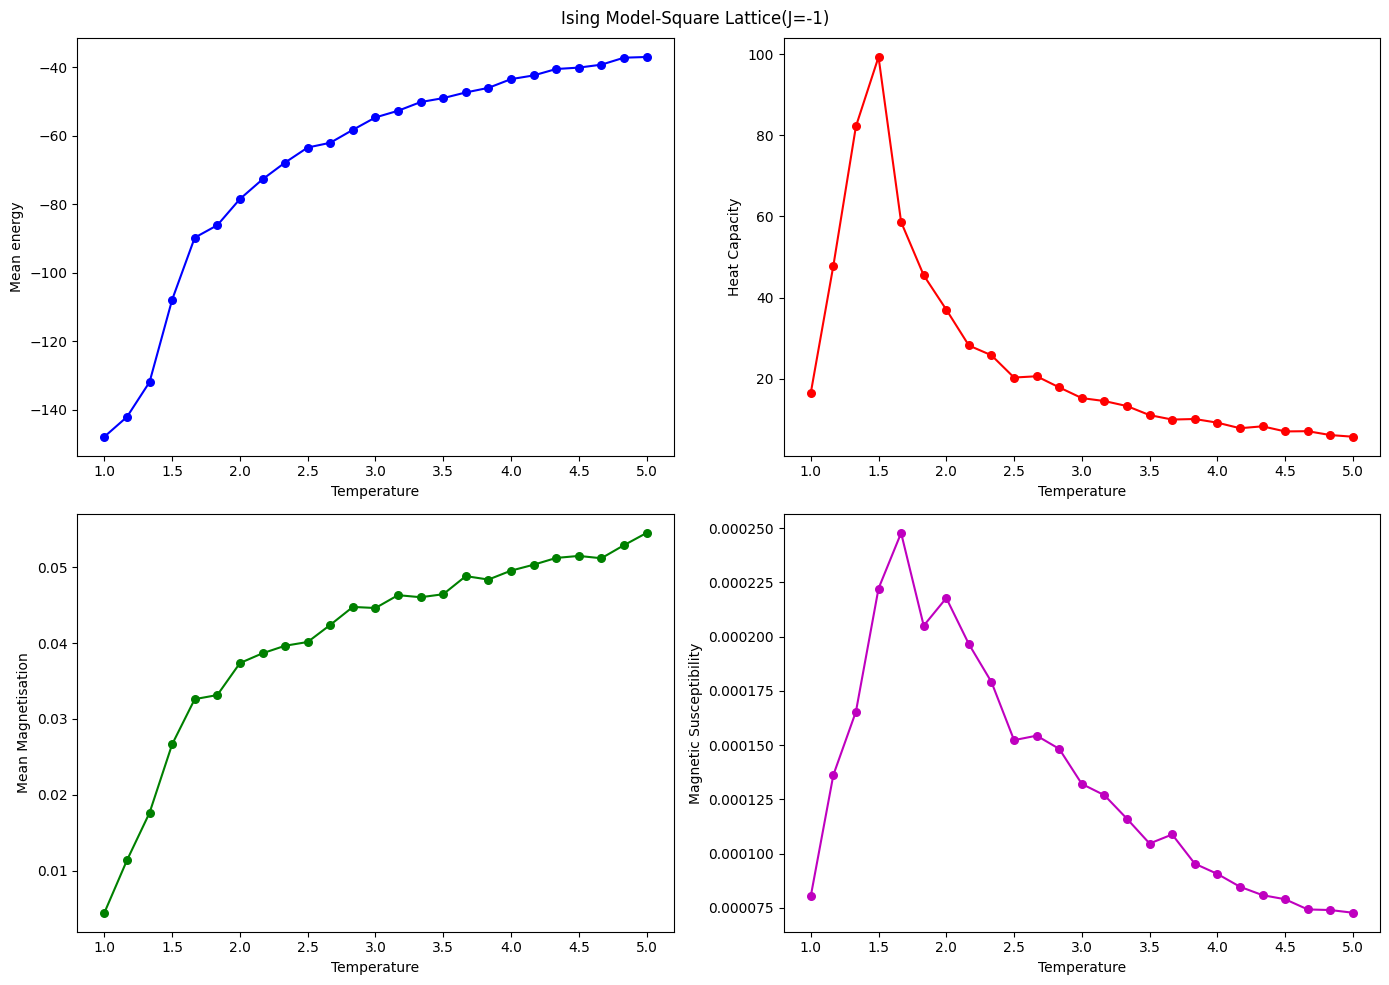

In [35]:

functions=[Eavg,sp,m,ms]
colors=['b','r','g','m']
titles=["Mean Energy vs Temperature","Heat capacity vs Temperature","Mean magnetisation vs Temperature","Magnetic susceptibility vs Temperature"]
fig,axes=plt.subplots(2,2,figsize=(14,10))
fig.suptitle("Ising Model-Square Lattice(J=-1)")
ylabels=["Mean energy","Heat Capacity","Mean Magnetisation","Magnetic Susceptibility"]
for ax,color,func,ylabel in zip(axes.flat,colors,functions,ylabels):
    ax.scatter(temp,func,color=color,marker='o', s=30)
    ax.plot(temp,func,color=color)
    ax.set_xlabel("Temperature")
    ax.set_ylabel(ylabel)

plt.tight_layout()
plt.show()

In [28]:
temp=np.linspace(1,5,25)
Eavg=[]
m=[]
ms=[]
sp=[]
for tem in tqdm(temp):
    matrix = np.random.choice([-1, 1], size=(N, N))
    energy_list,magnetisation_list = metropolis(k,matrix,tem,N,1,True)
    m_, ms_ =magnetisation(magnetisation_list,tem)
    E=mean_energy(energy_list)
    sp_=specific_heat(energy_list)
    sp.append(sp_)
    Eavg.append(E)
    m.append(m_)
    ms.append(ms_)


100%|██████████| 25/25 [04:21<00:00, 10.45s/it]


4it [00:00, 526.03it/s]


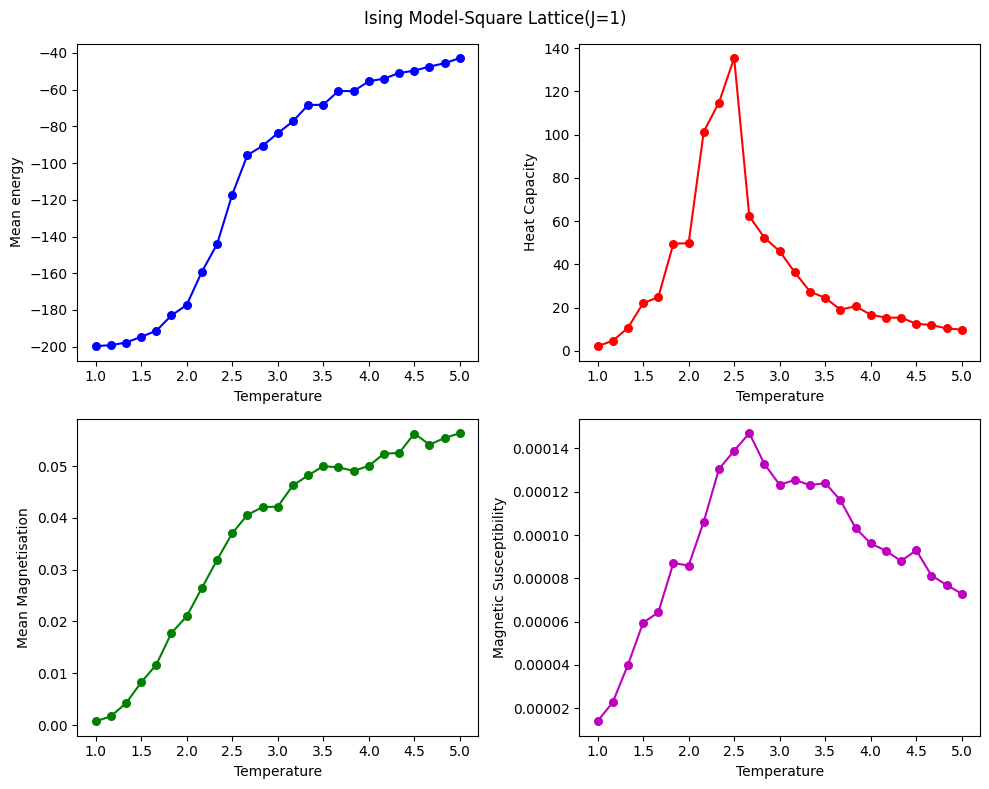

In [29]:
functions=[Eavg,sp,m,ms]
colors=['b','r','g','m']
fig,axes=plt.subplots(2,2,figsize=(10,8))
fig.suptitle("Ising Model-Square Lattice(J=1)")
ylabels=["Mean energy","Heat Capacity","Mean Magnetisation","Magnetic Susceptibility"]
for ax,color,func,ylabel in tqdm(zip(axes.flat,colors,functions,ylabels)):
    ax.scatter(temp,func,color=color,marker='o', s=30)
    ax.plot(temp,func,color=color)
    ax.set_xlabel("Temperature")
    ax.set_ylabel(ylabel)

plt.tight_layout()
plt.show()

In [33]:
temp=np.linspace(1,5,25)
Eavg=[]
m=[]
ms=[]
sp=[]
for tem in tqdm(temp):
    matrix = np.random.choice([-1, 1], size=(N, N))
    energy_list,magnetisation_list = metropolis(k,matrix,tem,N,1,False)
    m_, ms_ =magnetisation(magnetisation_list,tem)
    E=mean_energy(energy_list)
    sp_=specific_heat(energy_list)
    sp.append(sp_)
    Eavg.append(E)
    m.append(m_)
    ms.append(ms_)


100%|██████████| 25/25 [05:08<00:00, 12.33s/it]


4it [00:00, 403.86it/s]


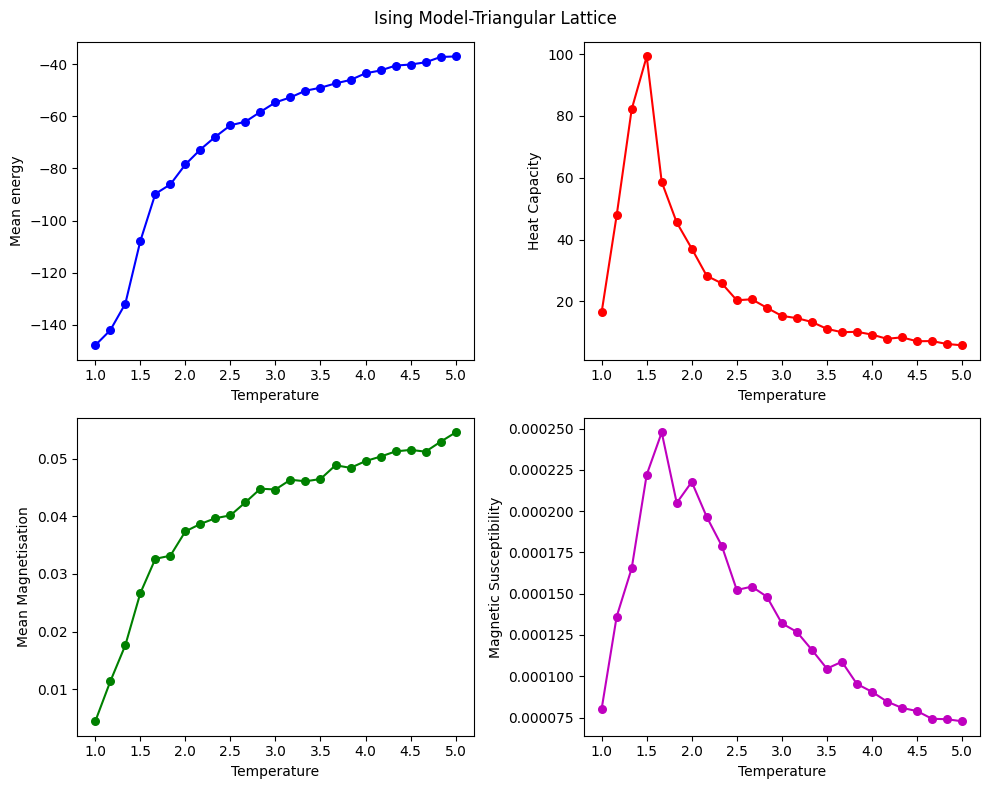

In [34]:

functions=[Eavg,sp,m,ms]
colors=['b','r','g','m']
fig,axes=plt.subplots(2,2,figsize=(10,8))
fig.suptitle("Ising Model-Triangular Lattice")
ylabels=["Mean energy","Heat Capacity","Mean Magnetisation","Magnetic Susceptibility"]
for ax,color,func,ylabel in tqdm(zip(axes.flat,colors,functions,ylabels)):
    ax.scatter(temp,func,color=color,marker='o', s=30)
    ax.plot(temp,func,color=color)
    ax.set_xlabel("Temperature")
    ax.set_ylabel(ylabel)

plt.tight_layout()
plt.show()